<a href="https://colab.research.google.com/github/sprashant19/Marketing-Campaign/blob/main/Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [402]:
# Importing the necessary packages
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing

In [360]:
data = pd.read_csv("/content/marketing_campaign.csv")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [362]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [363]:
data.Dt_Customer=pd.to_datetime(data.Dt_Customer,format='%d-%m-%Y')
data.Dt_Customer

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [364]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [365]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [366]:
# Adding Kidhome and Teenhome and creating a new column as Children.
data['Children']= data['Kidhome'] + data['Teenhome']

In [367]:
data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [368]:
#Replacing the same meaning words with correct word
data['Education'] = data['Education'].replace({'Basic' : 'Undergraduate','2n Cycle' : 'Undergraduate','Master':'PostGraduate','PhD' : 'PostGraduate','Graduation':'Graduate'})

In [369]:
data.Education.unique()

array(['Graduate', 'PostGraduate', 'Undergraduate'], dtype=object)

In [370]:
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [371]:
#Replacing the same meaning words with correct word
data['Marital_Status'] = data['Marital_Status'].replace({'Together':'Married','Divorced':'Single','Widow':'Single','Alone':'Single','Absurd':'Single','YOLO':'Single'})

In [372]:
data.Marital_Status.unique()

array(['Single', 'Married'], dtype=object)

In [373]:
data['Dt_Customer']=pd.DatetimeIndex(data['Dt_Customer']).year

In [374]:
#Creating a new column as customer age by adding Dt_Customer and Year_Birth
customer_age=data['Dt_Customer']-data['Year_Birth']
data['customer_age']=customer_age

In [375]:
# Dropping unwanted rows or those which has no meaning.
data = data.drop(columns=['ID','Year_Birth','Dt_Customer','Kidhome', 'Teenhome',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue','Recency','Response'])

In [376]:
data.describe()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,customer_age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.950446,44.222321
std,25173.076661,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.751803,12.022855
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,35303.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,36.000000
50%,51381.500000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,1.000000,43.000000
75%,68522.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1.000000,54.000000
max,666666.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.000000,121.000000


In [377]:
# outlier detection and elimination Income column
max = data['Income'].quantile(0.99999)
min = data['Income'].quantile(0.00001)
print(max,min)

655496.4416501094 1745.88155


In [378]:
data=data[data['Income']<max]
data=data[data['Income']>min]

In [379]:
data

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,customer_age
0,Graduate,Single,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,55
1,Graduate,Single,46344.0,11,1,6,2,1,6,2,1,1,2,5,2,60
2,Graduate,Married,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,48
3,Graduate,Married,26646.0,11,4,20,10,3,5,2,2,0,4,6,1,30
4,PostGraduate,Married,58293.0,173,43,118,46,27,15,5,5,3,6,5,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Married,61223.0,709,43,182,42,118,247,2,9,3,4,5,1,46
2236,PostGraduate,Married,64014.0,406,0,30,0,0,8,7,8,2,5,7,3,68
2237,Graduate,Single,56981.0,908,48,217,32,12,24,1,2,3,13,6,0,33
2238,PostGraduate,Married,69245.0,428,30,214,80,30,61,2,6,5,10,3,1,58


In [380]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Children', 'customer_age'],
      dtype='object')

Distribution plot

In [381]:
x=data["Education"].value_counts()
y=data["Education"].unique()
fig=go.Figure(data=[go.Pie(values=x,labels=y,text=y,title="<b>Distribution of Education data")])
fig.show()

Insights:

Graduates buy  more compared to other customers such as Post Graduates and UnderGraduates.

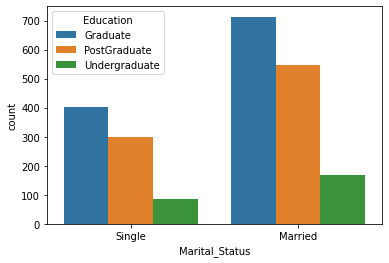

In [382]:
sns.countplot(x="Marital_Status",hue="Education",data=data)
plt.show()

Insights:

1.  Married customers are more than the single customers, shows maried customer buy products more than Single customers.
2. Graduate customers both in married as well as Single are more likely to buy products.

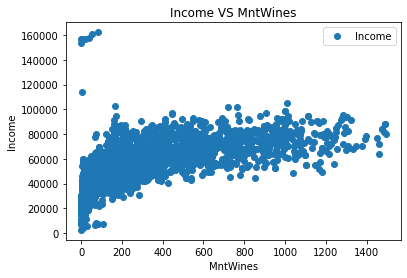

In [383]:
data.plot(x='MntWines',y='Income',style='o')
plt.title('Income VS MntWines')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

Insights

There is a Linear relation between MntWines and Income, as the income increases MntWines also increases.

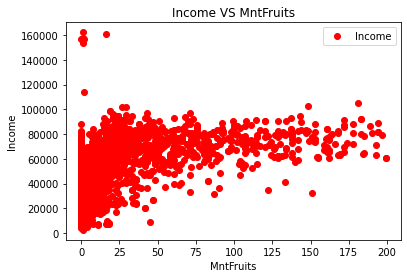

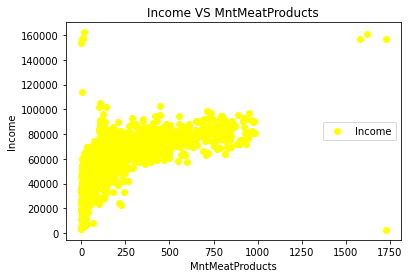

In [384]:
data.plot(x='MntFruits',y='Income',style='o',color='red')
plt.title('Income VS MntFruits')
plt.xlabel('MntFruits')
plt.ylabel('Income')
plt.show()
data.plot(x='MntMeatProducts',y='Income',style='o',color='yellow')
plt.title('Income VS MntMeatProducts')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

Insights

1. There is a Linear relation between MntFruits and Income, as the income increases MntFruits also increases.
2. There is a Linear relation between MntMeat and Income, as the income increases MntMeat also increases.

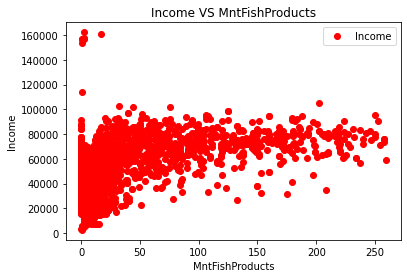

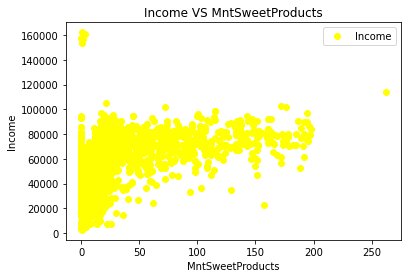

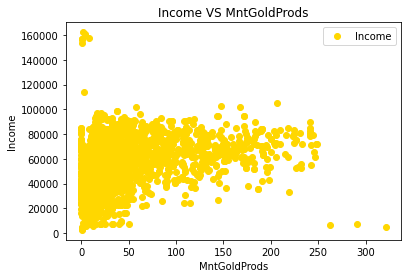

In [385]:
data.plot(x='MntFishProducts',y='Income',style='o',color='red')
plt.title('Income VS MntFishProducts')
plt.xlabel('MntFishProducts')
plt.ylabel('Income')
plt.show()
data.plot(x='MntSweetProducts',y='Income',style='o',color='yellow')
plt.title('Income VS MntSweetProducts')
plt.xlabel('MntSweetProducts')
plt.ylabel('Income')
plt.show()
data.plot(x='MntGoldProds',y='Income',style='o',color='gold')
plt.title('Income VS MntGoldProds')
plt.xlabel('MntGoldProds')
plt.ylabel('Income')
plt.show()

Insights

1. There is a Linear relation between MntFishProducts and Income, as the income increases MntFishProducts also increases.
2. There is a Linear relation between MntSweetProducts and Income, as the income increases MntSweetProducts also increases.
3.  There is a Linear relation between MntGoldProds and Income, as the income increases MntGoldProds also increases.

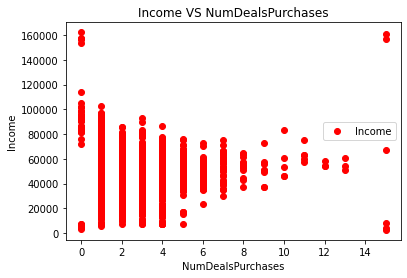

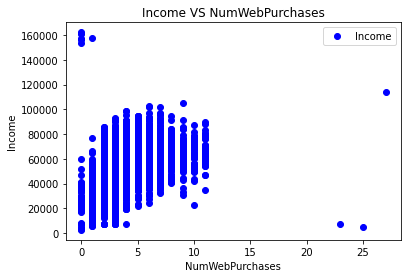

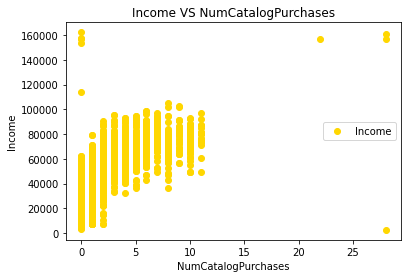

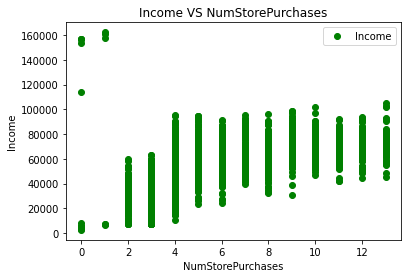

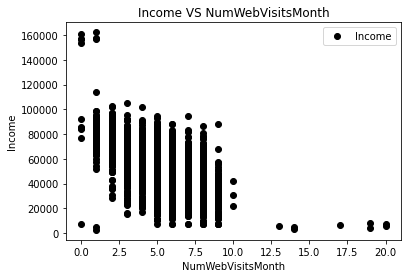

In [386]:
data.plot(x='NumDealsPurchases',y='Income',style='o',color='red')
plt.title('Income VS NumDealsPurchases')
plt.xlabel('NumDealsPurchases')
plt.ylabel('Income')
plt.show()
data.plot(x='NumWebPurchases',y='Income',style='o',color='blue')
plt.title('Income VS NumWebPurchases')
plt.xlabel('NumWebPurchases')
plt.ylabel('Income')
plt.show()
data.plot(x='NumCatalogPurchases',y='Income',style='o',color='gold')
plt.title('Income VS NumCatalogPurchases')
plt.xlabel('NumCatalogPurchases')
plt.ylabel('Income')
plt.show()
data.plot(x='NumStorePurchases',y='Income',style='o',color='green')
plt.title('Income VS NumStorePurchases')
plt.xlabel('NumStorePurchases')
plt.ylabel('Income')
plt.show()
data.plot(x='NumWebVisitsMonth',y='Income',style='o',color='black')
plt.title('Income VS NumWebVisitsMonth')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Income')
plt.show()

Insights

1. There is a Linear relation between NumDealsPurchases and Income, as the income increases NumDealsPurchases also increases.
2. There is a Linear relation between NumWebPurchases and Income, as the income increases NumWebPurchases also increases.
3.  There is a Linear relation between NumCatalogPurchases and Income, as the income increases NumCatalogPurchases also increases.
4. There is a Linear relation between NumStorePurchases and Income, as the income increases NumStorePurchases also increases.
5. There is a Linear relation between NumWebVisitsMonth and Income, as the income increases NumWebVisitsMonth also increases.

In [387]:
fig=px.histogram(data,x="Children",y="Income",color="Children",title="<b>Income VS Children")
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig

Insights

Customers with the 1 child has more income than the others, customers with 3 children have least income among them.

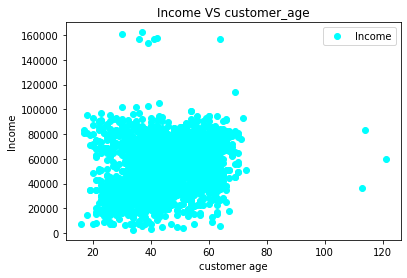

In [388]:
data.plot(x='customer_age',y='Income',style='o',color='cyan')
plt.title('Income VS customer_age')
plt.xlabel('customer age')
plt.ylabel('Income')
plt.show()

Insights

Customers in the age group of 20-70 are the ones who buy product most often than the other customers.

Encoding the Data

In [389]:
# Encoding the Education and Marital Status columns.
label_encoder = preprocessing.LabelEncoder()
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])

In [390]:
data

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,customer_age
0,0,1,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,55
1,0,1,46344.0,11,1,6,2,1,6,2,1,1,2,5,2,60
2,0,0,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,48
3,0,0,26646.0,11,4,20,10,3,5,2,2,0,4,6,1,30
4,1,0,58293.0,173,43,118,46,27,15,5,5,3,6,5,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,0,61223.0,709,43,182,42,118,247,2,9,3,4,5,1,46
2236,1,0,64014.0,406,0,30,0,0,8,7,8,2,5,7,3,68
2237,0,1,56981.0,908,48,217,32,12,24,1,2,3,13,6,0,33
2238,1,0,69245.0,428,30,214,80,30,61,2,6,5,10,3,1,58


Scaling the data

In [391]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(data)

Model Training

Text(0, 0.5, 'Inertia')

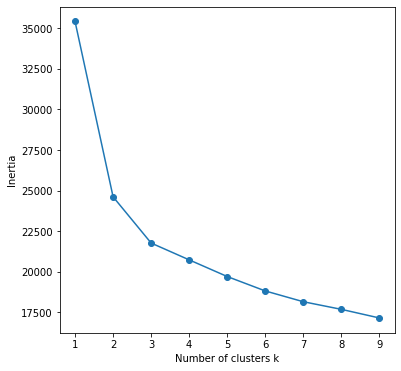

In [392]:
inertias = []
list_k =list(range(1,10))
for k in list_k:
  km = KMeans(n_clusters=k)
  km.fit(X_std)
  inertias.append(km.inertia_)
plt.figure(figsize=(6,6))
plt.plot(list_k,inertias,'-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')

From the plot above we see that as k reaches 2, there is incremental decreasing of the plot. Therefore we choose k = 2.

In [393]:
km = KMeans(n_clusters=2)     
km.fit(X_std)
centroids=km.cluster_centers_
centroids

array([[ 0.06046097, -0.02482031, -0.58711363, -0.56018466, -0.49965937,
        -0.57265959, -0.51233588, -0.49602502, -0.40324966,  0.12511116,
        -0.38318283, -0.59031861, -0.55217063,  0.4526446 ,  0.40325883,
        -0.07956156],
       [-0.09519087,  0.03907756,  0.92436262,  0.88196515,  0.78667301,
         0.90160591,  0.80663115,  0.78095102,  0.63488377, -0.19697733,
         0.60329017,  0.9294086 ,  0.86934772, -0.71265208, -0.6348982 ,
         0.1252632 ]])

In [394]:
km.inertia_   #inertia 

24613.93953562338

In [395]:
y_predicted = km.fit_predict(data)
y_predicted

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [396]:
data['cluster']=y_predicted

In [397]:
data

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,customer_age,cluster
0,0,1,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,55,0
1,0,1,46344.0,11,1,6,2,1,6,2,1,1,2,5,2,60,1
2,0,0,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,48,0
3,0,0,26646.0,11,4,20,10,3,5,2,2,0,4,6,1,30,1
4,1,0,58293.0,173,43,118,46,27,15,5,5,3,6,5,1,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,0,61223.0,709,43,182,42,118,247,2,9,3,4,5,1,46,0
2236,1,0,64014.0,406,0,30,0,0,8,7,8,2,5,7,3,68,0
2237,0,1,56981.0,908,48,217,32,12,24,1,2,3,13,6,0,33,0
2238,1,0,69245.0,428,30,214,80,30,61,2,6,5,10,3,1,58,0


In [398]:
cluster_summary1 = data.groupby('cluster')[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Income']].mean().reset_index()

In [399]:
cluster_summary1

,cluster,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Income
0,0,543.768089,46.676252,304.841373,65.531540,47.739332,66.145640,70315.197588
1,1,79.129401,7.106514,36.463908,11.226232,7.421655,22.983275,34605.396127


From the above table we can conclude that :

1. As the income of cluster 1 is more than cluster 0, former is more likely to spend more than the other. MntWines is the most consumed product in the product category, then meat products. Therefore it can said that customers are more likely to buy Wines than the other products. 
2. Both  customers spend minimum on fruits than any other product.
Finally the product buying behaviour of the customers mostly depend on the Income of the customer.

In [400]:
cluster_summary2 = data.groupby('cluster')[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Income']].mean().reset_index()

In [401]:
cluster_summary2

,cluster,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income
0,0,2.227273,5.489796,4.588126,8.070501,3.911874,70315.197588
1,1,2.402289,2.757042,0.855634,3.654930,6.640845,34605.396127


The Insights from the above table are:
1. Cluster 0 customers like to buy from web visits more ,also Catalog purchases are least prefered for this cluster.
2. Cluster 1 customers like to go to store and purchase a product, also they don't like to buy through deals as shown above.